In [31]:
#Import libries

import numpy as np
import pandas as pd

In [45]:
#Import data set

data = pd.read_csv("heart_disease.csv")

In [49]:
#Load data set

data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [51]:
#Check data set shape

data.shape

(10000, 21)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [55]:
#Check null values count

data.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [57]:
#Remove null values

data = data.dropna()

In [59]:
#After remove null values check again data set have null values

data.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [61]:
# Check duplicate values

data.duplicated().sum()

0

In [63]:
#After remove null values and duplicates new data set shape

data.shape

(7067, 21)

In [65]:
data.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [67]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))

# Print how many outliers each column has
print(outliers.sum())

Age                    0
Blood Pressure         0
Cholesterol Level      0
BMI                    0
Sleep Hours            0
Triglyceride Level     0
Fasting Blood Sugar    0
CRP Level              0
Homocysteine Level     0
dtype: int64


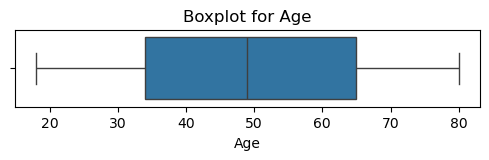

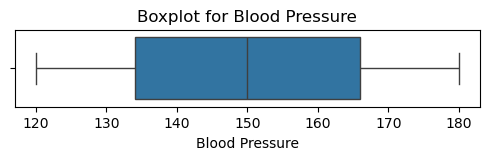

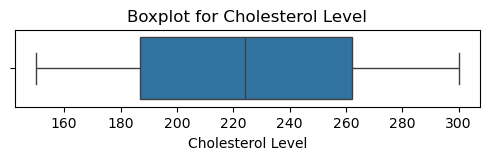

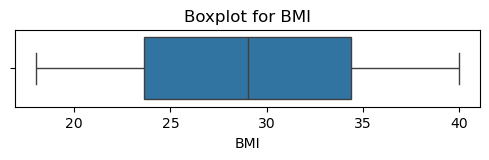

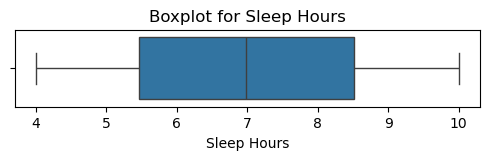

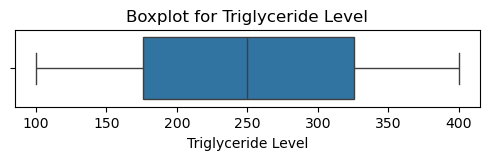

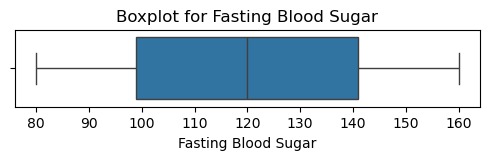

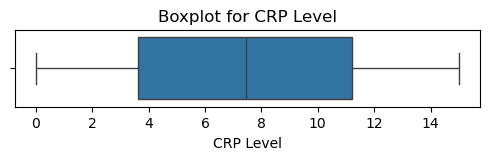

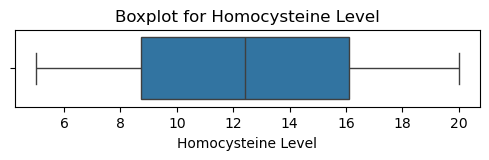

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# For each numerical column, plot a boxplot
for column in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

### Check value counts in categorical columns and Boolean columns

In [74]:
data["Gender"].value_counts()

Gender
Male      3564
Female    3503
Name: count, dtype: int64

In [76]:
data["Exercise Habits"].value_counts()

Exercise Habits
High      2413
Medium    2336
Low       2318
Name: count, dtype: int64

In [78]:
data["Smoking"].value_counts()

Smoking
Yes    3634
No     3433
Name: count, dtype: int64

In [80]:
data["Family Heart Disease"].value_counts()

Family Heart Disease
No     3540
Yes    3527
Name: count, dtype: int64

In [82]:
data["Diabetes"].value_counts()

Diabetes
No     3551
Yes    3516
Name: count, dtype: int64

In [84]:
data["High Blood Pressure"].value_counts()

High Blood Pressure
Yes    3561
No     3506
Name: count, dtype: int64

In [86]:
data["Low HDL Cholesterol"].value_counts()

Low HDL Cholesterol
Yes    3540
No     3527
Name: count, dtype: int64

In [88]:
data["High LDL Cholesterol"].value_counts()

High LDL Cholesterol
No     3608
Yes    3459
Name: count, dtype: int64

In [90]:
data["Alcohol Consumption"].value_counts()

Alcohol Consumption
Medium    2391
Low       2371
High      2305
Name: count, dtype: int64

In [92]:
data["Alcohol Consumption"].value_counts()

Alcohol Consumption
Medium    2391
Low       2371
High      2305
Name: count, dtype: int64

In [94]:
data["Sugar Consumption"].value_counts()

Sugar Consumption
Low       2403
High      2379
Medium    2285
Name: count, dtype: int64

In [96]:
data["Heart Disease Status"].value_counts()

Heart Disease Status
No     5632
Yes    1435
Name: count, dtype: int64

In [98]:
# Import new data set in to new Excel file
data.to_excel('Data.xlsx', index=False)